Lets assume we have a computational grid, but we don't know the mesh quality.
In the following we want to analyze the quality of a mesh. We want to use ntrfc modules to compute various quality metrics for the cells of the mesh, such as aspect ratio, skewness, and expansion factors.
The script then plots histograms of the computed quality metrics using Matplotlib and displays the mesh using PyVista, coloring the cells based on the quality metric being visualized.

Lets start with importing the necessary modules and with downloading an example mesh.

In [1]:
from pyvista import examples
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
import os

from ntrfc.filehandling.mesh import load_mesh


pv.set_jupyter_backend("static")

if os.getenv('DISPLAY') is None:
    pv.start_xvfb()  # Start X virtual framebuffer (Xvfb)

dataset = examples.download_cgns_structured(load=False)
mesh = load_mesh(dataset)

The compute_cell_aspect_ratios function appears to compute the aspect ratio of each cell in the mesh, which is a measure of how elongated or squat the cell is. This is done by dividing the maximum length of the cell's edges by the minimum length of the cell's edges. The aspect ratio of a cell is generally considered to be good if it is close to 1, as cells with high aspect ratios can cause problems in certain types of simulations.

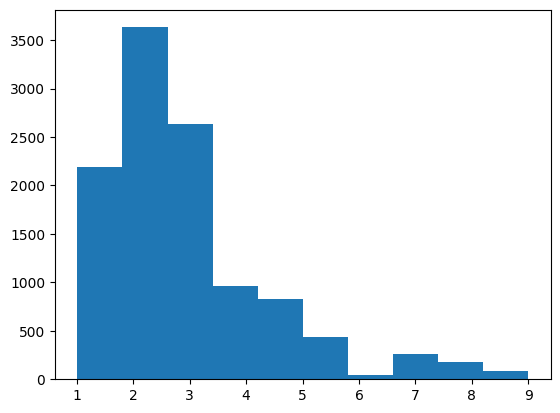

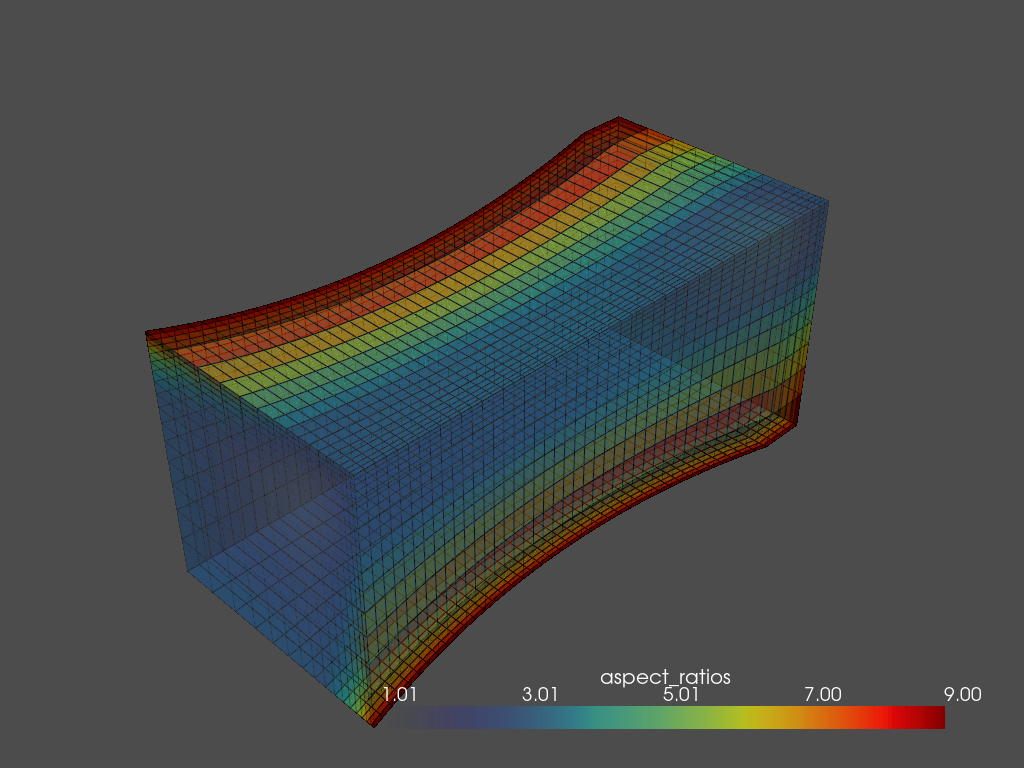

In [2]:
from ntrfc.meshquality.aspect_ratio import compute_cell_aspect_ratios

aspect_ratios = compute_cell_aspect_ratios(mesh)

counts, bins = np.histogram(aspect_ratios)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

mesh["aspect_ratios"]=aspect_ratios
# Render the mesh
p = pv.Plotter()
p.add_mesh(mesh, cmap="jet", scalars="aspect_ratios", opacity="linear", show_edges=True)
p.show()

The compute_cell_skewness function computes the skewness of each cell in the mesh, which is a measure of how distorted the cell is. Cells with high skewness can cause problems in simulations.


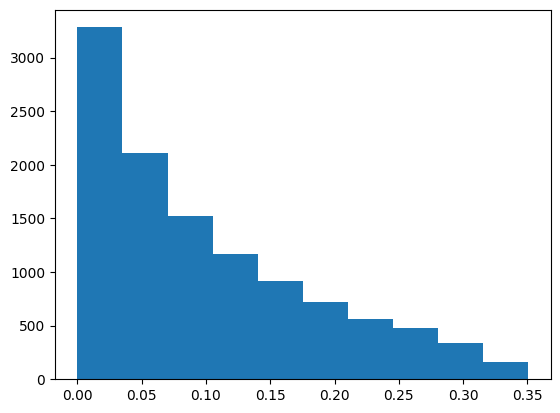

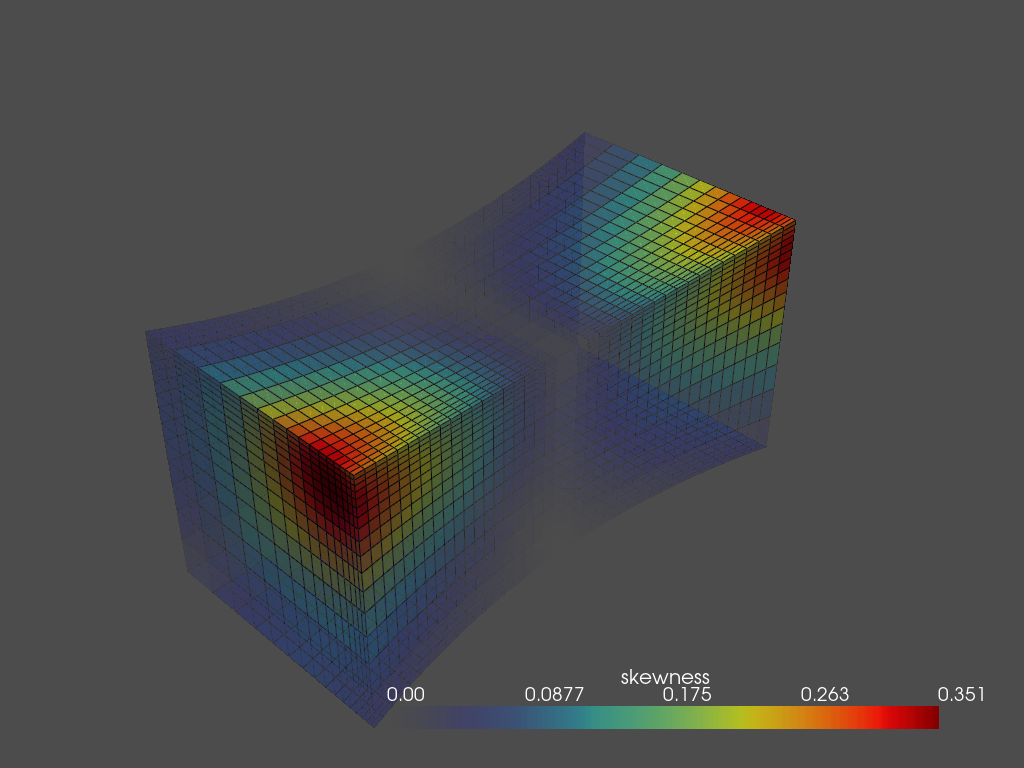

In [3]:

from ntrfc.meshquality.skewness import compute_cell_skewness

skewness = compute_cell_skewness(mesh)

counts, bins = np.histogram(skewness)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()


mesh["skewness"]=skewness
# Render the mesh
p = pv.Plotter()
p.add_mesh(mesh, cmap="jet", scalars="skewness", opacity="linear", show_edges=True)
p.show()

The compute_expansion_factors function computes the expansion factors of each cell in the mesh, which is a measure of how big the maximum volume ratio of a cell is to it's neighbors.

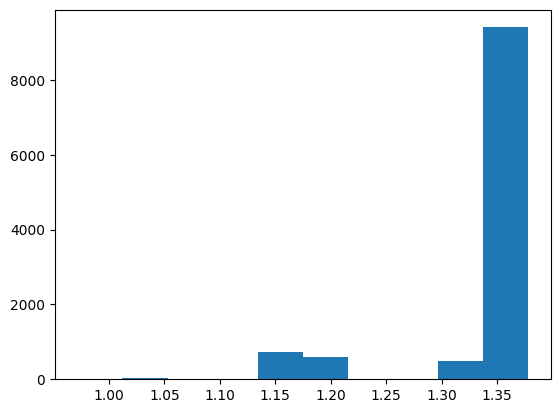

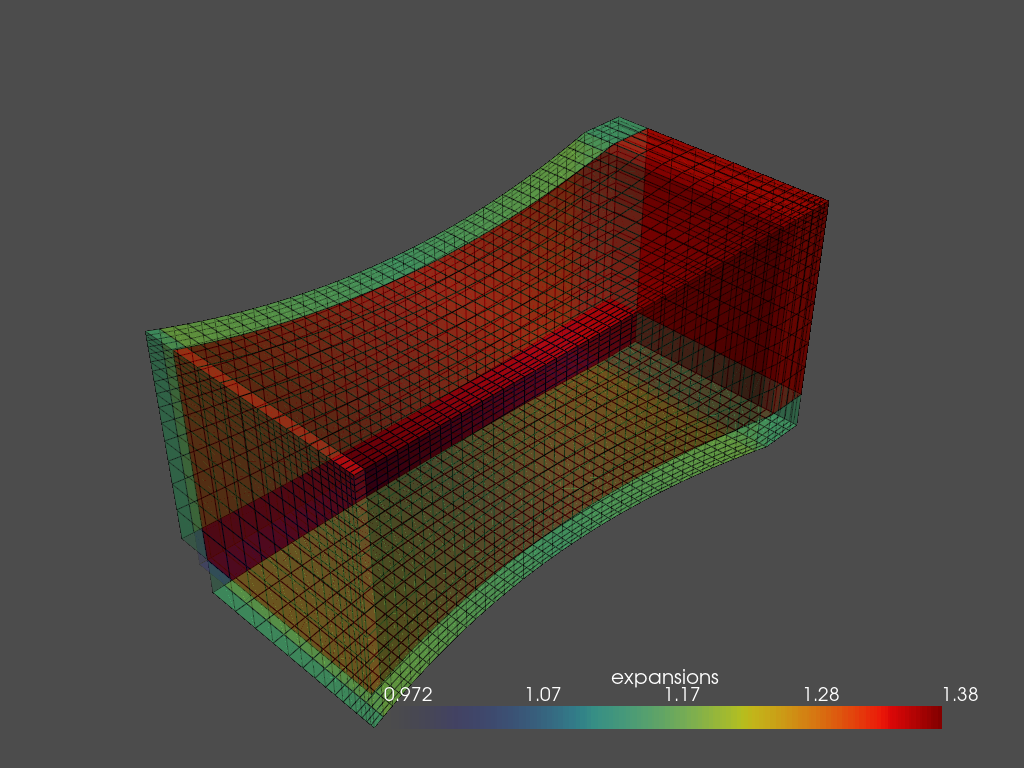

In [4]:
from ntrfc.meshquality.meshexpansion import compute_expansion_factors

expansions = compute_expansion_factors(mesh)
counts, bins = np.histogram(expansions)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

mesh["expansions"]=expansions
# Render the mesh
p = pv.Plotter()
p.add_mesh(mesh, cmap="jet", scalars="expansions", opacity="linear", show_edges=True)
p.show()
